In [8]:
from visual_behavior_glm.glm import GLM
import visual_behavior_glm.GLM_fit_tools as gft
import visual_behavior_glm.GLM_analysis_tools as gat
import visual_behavior_glm.GLM_visualization_tools as gvt

import visual_behavior.utilities as vbu
import visual_behavior.plotting as vbp
import visual_behavior.data_access.loading as loading
import visual_behavior.data_access.reformat as reformat
import visual_behavior.visualization.utils as vis_utils
import visual_behavior.database as db
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis

import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [3]:
%matplotlib notebook
%widescreen

applied a custom magic command to make full use of screen width
will only work if command is defined locally
replace with the following to replicate functionality: 
	from IPython.core.display import display, HTML
	display(HTML("<style>.container { width:100% !important; }</style>")


In [4]:
et = loading.get_filtered_ophys_experiment_table()
et.cre_line.unique()

array(['Sst-IRES-Cre', 'Vip-IRES-Cre', 'Slc17a7-IRES2-Cre'], dtype=object)

In [5]:
et.query('cre_line == "Slc17a7-IRES2-Cre"')

,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,...,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,model_outputs_available,location,has_events,session_number
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
877696762,877103886,877287655,876693090,VisualBehavior,container_qc,passed,20190529_449441_2ImagesA,OPHYS_2_images_A_passive,CAM2P.3,2019-05-29 14:58:33.000000,...,NaN,830940327,Slc17a7-IRES2-Cre,NaN,NaN,0,False,Slc17a7_VISp_175,True,2
879332693,878436988,878703444,876693090,VisualBehavior,container_qc,passed,20190531_449441_1imagesA,OPHYS_1_images_A,CAM2P.3,2019-05-31 15:54:45.000000,...,NaN,830940327,Slc17a7-IRES2-Cre,NaN,NaN,2,True,Slc17a7_VISp_175,True,1
880375092,879719132,879846624,876693090,VisualBehavior,container_qc,passed,20190603_449441_4imagesB,OPHYS_4_images_B,CAM2P.3,2019-06-03 15:06:45.000000,...,NaN,830940327,Slc17a7-IRES2-Cre,NaN,NaN,0,True,Slc17a7_VISp_175,True,4
882935355,882620042,882669474,876693090,VisualBehavior,container_qc,passed,20190607_449441_6ImagesB,OPHYS_6_images_B,CAM2P.3,2019-06-07 15:02:48.000000,...,NaN,830940327,Slc17a7-IRES2-Cre,NaN,NaN,1,True,Slc17a7_VISp_175,True,6
884218326,883349458,883462580,876693090,VisualBehavior,container_qc,passed,20190610_449441_5ImagesB,OPHYS_5_images_B_passive,CAM2P.3,2019-06-10 14:47:36.000000,...,NaN,830940327,Slc17a7-IRES2-Cre,NaN,NaN,0,False,Slc17a7_VISp_175,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901559828,900802327,901251663,895259496,VisualBehaviorTask1B,container_qc,passed,20190708_461946_3imagesB,OPHYS_3_images_B,CAM2P.5,2019-07-08 16:09:58.000000,...,NaN,862671211,Slc17a7-IRES2-Cre,NaN,NaN,0,True,Slc17a7_VISp_175,True,3
902487182,901759468,902135840,895259496,VisualBehaviorTask1B,container_qc,passed,20190709_461946_2imagesB,OPHYS_2_images_B_passive,CAM2P.5,2019-07-09 15:42:29.000000,...,NaN,862671211,Slc17a7-IRES2-Cre,NaN,NaN,0,False,Slc17a7_VISp_175,False,2
903405627,902777219,902871565,895259496,VisualBehaviorTask1B,container_qc,passed,20190710_461946_4imagesA,OPHYS_4_images_A,CAM2P.5,2019-07-10 17:19:50.000000,...,NaN,862671211,Slc17a7-IRES2-Cre,NaN,NaN,0,True,Slc17a7_VISp_175,False,4


In [6]:
oeid = 808621958

In [7]:
dataset = loading.get_ophys_dataset(oeid)
dataframe_format='wide'
session = ResponseAnalysis(
    dataset, 
    overwrite_analysis_files=False, 
    use_extended_stimulus_presentations=True, 
    dataframe_format = dataframe_format
) 

/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


In [13]:
tidy_dff_df = reformat.get_tidy_dff_traces(dataset)
tidy_dff_df

,timestamps,cell_specimen_id,dff
0,2.62769,817102078,0.485649
1,2.65999,817102078,0.434840
2,2.69229,817102078,0.383428
3,2.72460,817102078,0.520436
4,2.75690,817102078,0.370365
...,...,...,...
140271,4534.79764,817103784,0.087813
140272,4534.82995,817103784,0.023570
140273,4534.86227,817103784,0.186435
140274,4534.89458,817103784,0.505039


In [52]:
session.dataset.dff_dataframe

,timestamps,cell_specimen_id,dff
0,2.62769,817102078,0.485649
1,2.65999,817102078,0.434840
2,2.69229,817102078,0.383428
3,2.72460,817102078,0.520436
4,2.75690,817102078,0.370365
...,...,...,...
140271,4534.79764,817103784,0.087813
140272,4534.82995,817103784,0.023570
140273,4534.86227,817103784,0.186435
140274,4534.89458,817103784,0.505039


In [7]:
session.dataset.dff_traces.head()

,cell_roi_id,dff
cell_specimen_id,,
817103095,858478970,"[0.339445319882651, 0.566894639635454, 0.97799..."
817102140,858478972,"[0.9604398293312864, 1.3386139358679698, 1.093..."
817102443,858478976,"[1.4235738475636015, 1.3899158111755137, 1.388..."
817102556,858478978,"[1.665763863891657, 1.7555186489666341, 2.1007..."
817103413,858478980,"[0.2382422954322384, 0.5270716440324557, 0.626..."


In [8]:
dff_df = pd.DataFrame({'timestamps':session.dataset.ophys_timestamps})
for csid in session.dataset.cell_specimen_ids:
    dff_df[csid] = session.dataset.dff_traces.loc[csid]['dff']
dff_df.head()

,timestamps,817102078,817102113,817102140,817102152,817102163,817102180,817102189,817102217,817102241,...,817103360,817103378,817103394,817103413,817103429,817103547,817103599,817103615,817103627,817103784
0,2.62769,0.485649,2.896051,0.960440,0.607600,0.634621,0.519022,0.906934,0.426700,0.168370,...,0.381384,0.781098,1.174324,0.238242,0.542819,0.349067,0.597731,0.512783,0.123728,0.467183
1,2.65999,0.434840,2.490712,1.338614,0.426810,0.431943,0.369768,0.576393,0.557862,0.368525,...,0.314469,1.842149,1.234517,0.527072,0.086421,0.237154,0.448655,0.431600,0.297289,0.288027
2,2.69229,0.383428,2.284347,1.093696,0.547299,0.826328,0.793838,0.756318,0.270046,0.347773,...,0.439582,1.220449,0.716015,0.626445,0.739725,0.397613,0.332284,0.618880,0.379515,0.297544
3,2.72460,0.520436,2.697445,1.442895,0.244133,0.654836,0.377281,0.602576,0.171978,0.134797,...,0.172905,1.026451,1.273186,0.443585,0.416509,0.269080,0.560411,0.300112,0.441158,0.164504
4,2.75690,0.370365,2.624308,1.212114,0.338133,0.581743,0.340167,0.231319,0.289906,0.240426,...,0.370728,1.011700,0.662183,0.532733,0.477312,0.046470,0.387888,0.428299,0.286205,0.300072


In [84]:
def plot_dff_and_events(session, csid, t_range=180):
    
    fig=plt.figure(figsize=(15,10))
    axes= {
        'timeseries':vbp.placeAxesOnGrid(fig, xspan=[0,1], yspan=[0,0.45]),
        'event_triggered_average':vbp.placeAxesOnGrid(fig, xspan=[0,0.45], yspan=[0.55,1]),
    }
    
    # plot a sample of the timeseries surrounding the max event
    df = pd.DataFrame({
        'time':session.dataset.ophys_timestamps, 
        'dff':session.dataset.dff_traces.loc[csid]['dff'],
        'events':session.dataset.events.loc[csid]['events'],
    })
    idxmax = df.query('time >1000 and time <3000')['dff'].idxmax()
    tmax = df.iloc[idxmax]['time']
    

    df.query('time > @tmax - @t_range/2 and time < @tmax + @t_range/2').plot(
        x='time',
        y='dff',
        ax=axes['timeseries'],
        color='black'
    )
    df.query('time > @tmax - @t_range/2 and time < @tmax + @t_range/2').plot(
        x='time',
        y='events',
        ax=axes['timeseries'],
        color='red',
        marker='.'
    )
    
    # plot the event triggered average
    etr = vbu.event_triggered_response(
        session.dataset.dff_dataframe.query('cell_specimen_id == @csid'), 
        parameter = 'dff', 
        event_times = session.ophys_timestamps[np.where(session.dataset.events.loc[csid]['events']>0)[0]],
        output_format='tidy'
    )
    
    sns.lineplot(
        data=etr,
        x='time',
        y='dff',
        n_boot=100,
        ax=axes['event_triggered_average']
    )
    
    axes['timeseries'].set_title('timeseries sample')
    axes['event_triggered_average'].set_title('average dff surrounding each event')
    
    metadata = session.dataset.metadata
    title='oeid={} cre_line={} rig={} cell_specimen_id={}'.format(metadata['ophys_experiment_id'], metadata['driver_line'][0],  metadata['rig_name'], csid)

    fig.suptitle(title)
    return fig, axes

<IPython.core.display.Javascript object>


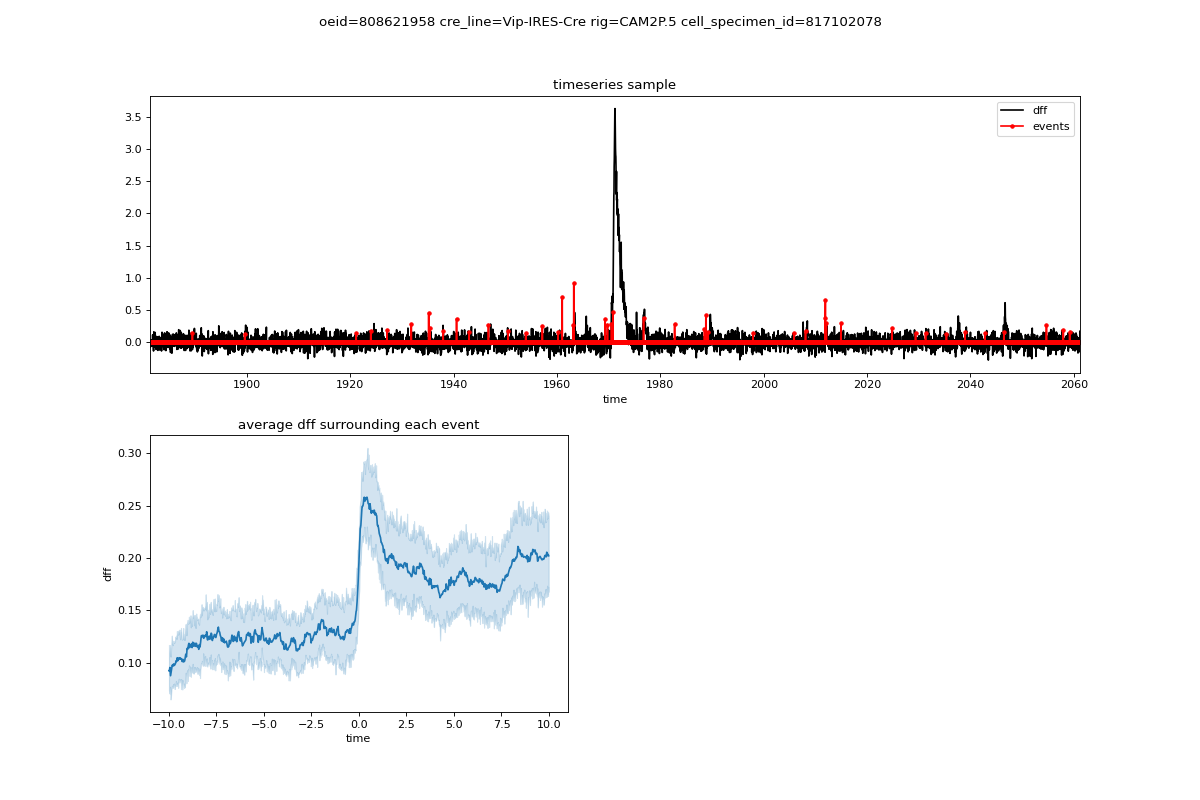

getting L0 events


/home/dougo/.conda/envs/visual_behavior/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/dougo/.conda/envs/visual_behavior/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/dougo/.conda/envs/visual_behavior/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = 

getting L0 events


In [85]:
fig,ax=plot_dff_and_events(session, session.dataset.cell_specimen_ids[0])

<IPython.core.display.Javascript object>


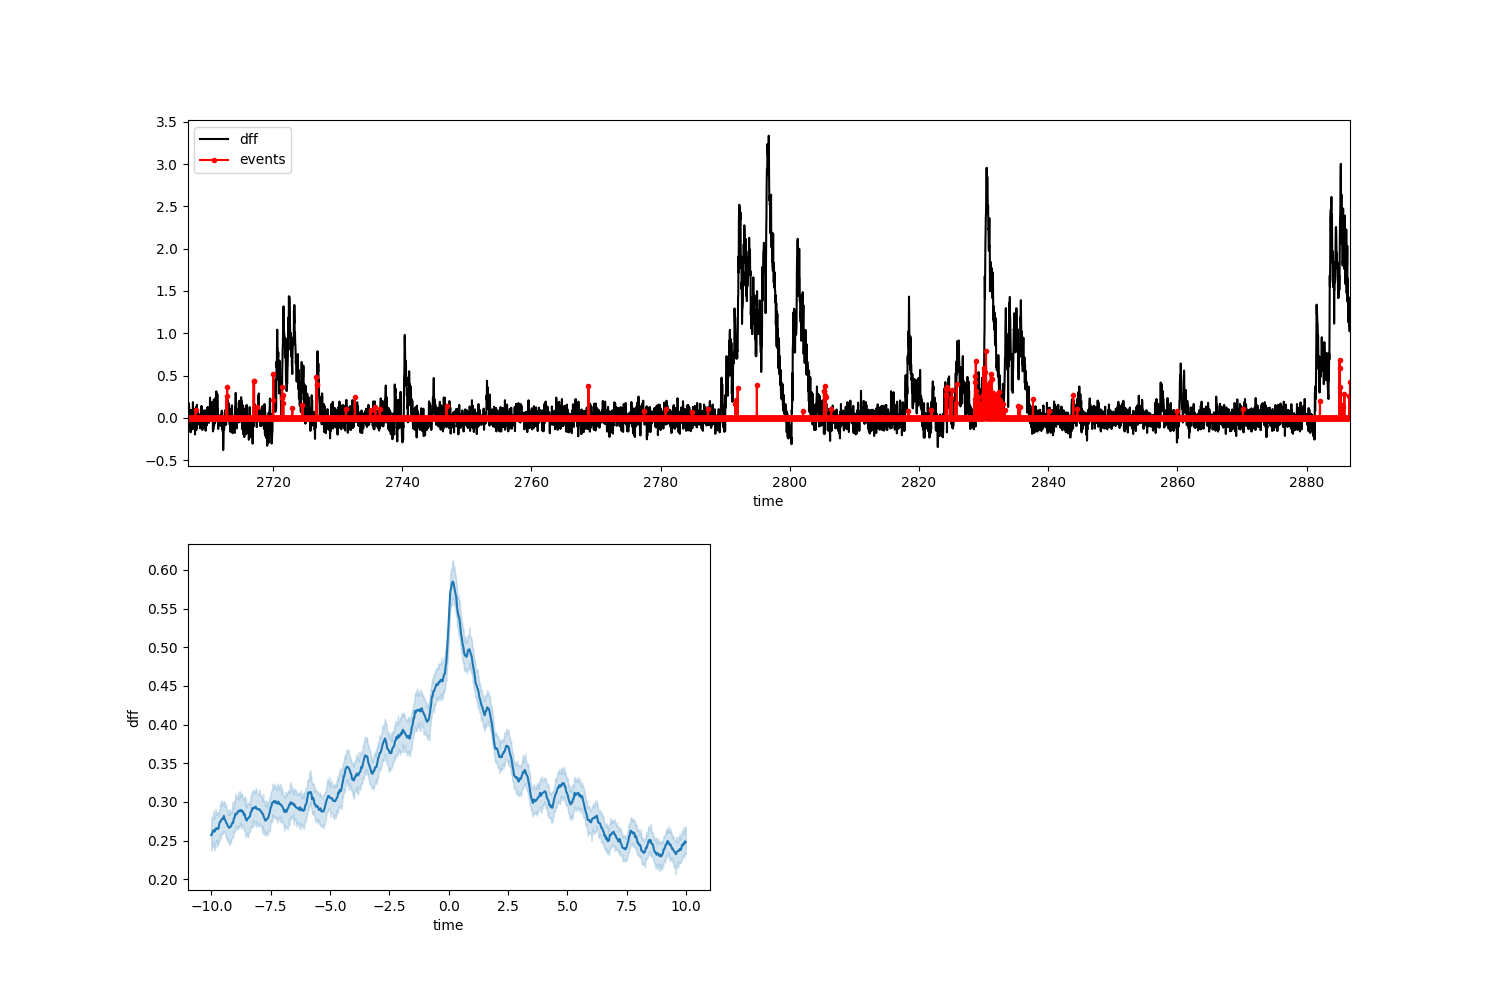

getting L0 events
getting L0 events


/home/dougo/.conda/envs/visual_behavior/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/dougo/.conda/envs/visual_behavior/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/dougo/.conda/envs/visual_behavior/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = 

In [68]:
fig,ax=plot_dff_and_events(session, session.dataset.cell_specimen_ids[1])

<IPython.core.display.Javascript object>


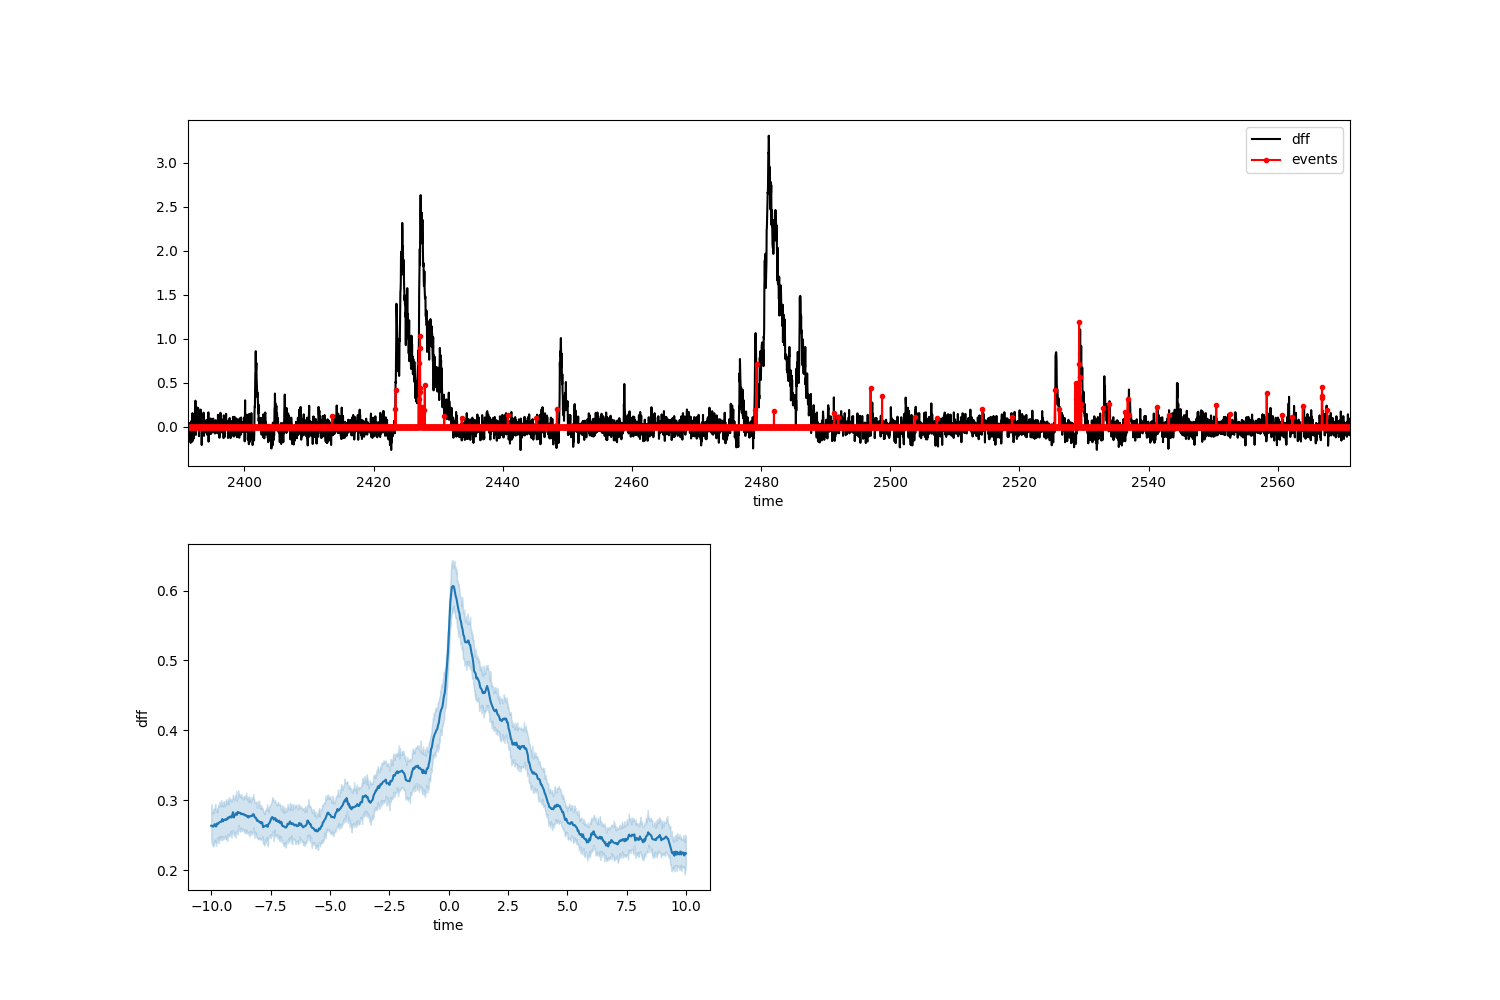

getting L0 events
getting L0 events


/home/dougo/.conda/envs/visual_behavior/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/dougo/.conda/envs/visual_behavior/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/dougo/.conda/envs/visual_behavior/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = 

In [70]:
fig,ax=plot_dff_and_events(session, session.dataset.cell_specimen_ids[2])

getting L0 events


<IPython.core.display.Javascript object>


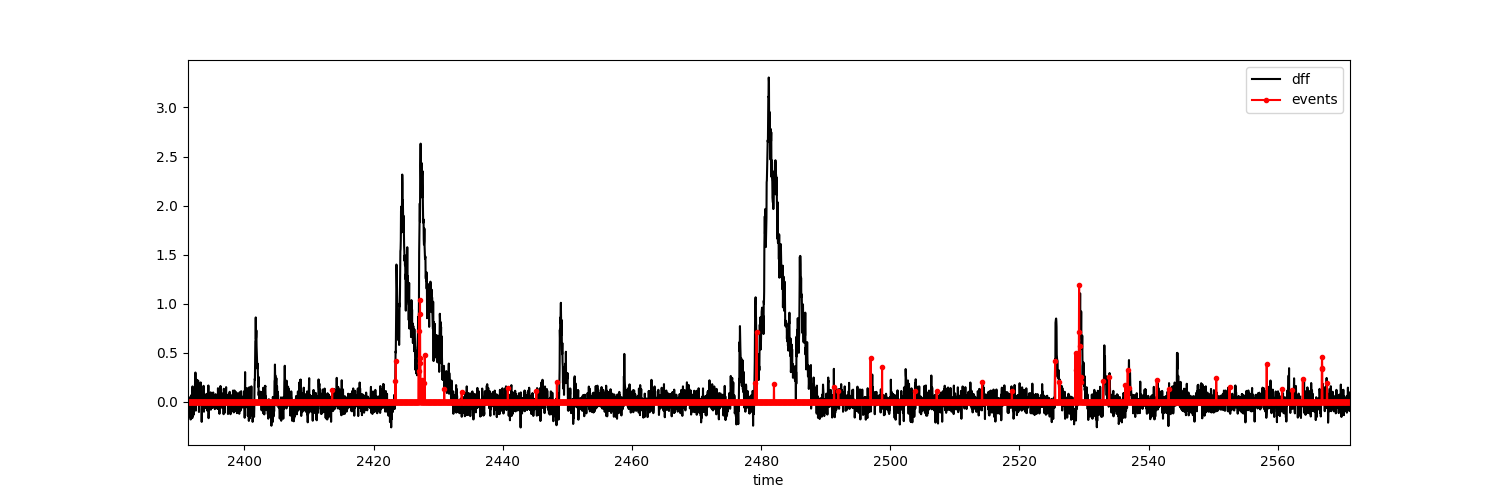

In [27]:
fig,ax=plot_dff_and_events(session, session.dataset.cell_specimen_ids[3])

getting L0 events


<IPython.core.display.Javascript object>


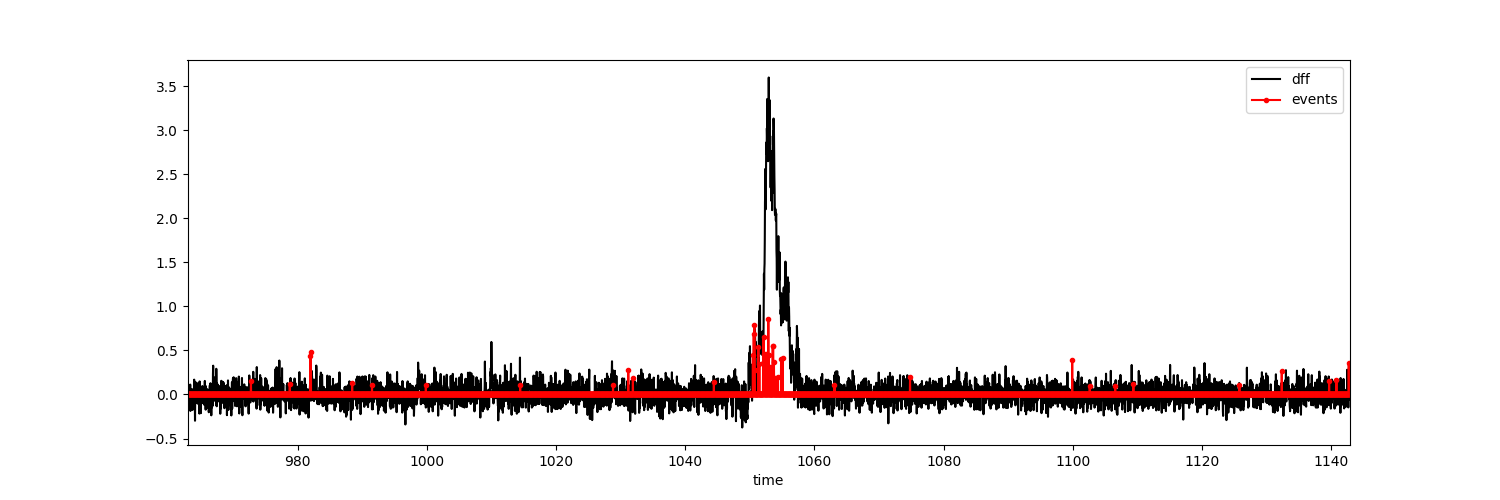

In [28]:
fig,ax=plot_dff_and_events(session, session.dataset.cell_specimen_ids[3])

In [42]:
etr = vbu.event_triggered_response(
    dff_df, 
    parameter = csid, 
    event_times = session.ophys_timestamps[np.where(session.dataset.events.loc[csid]['events']>0)[0]],
    output_format='tidy'
)

getting L0 events


KeyError: "['variable'] not found in axis"

In [43]:
%debug

> /home/dougo/.conda/envs/visual_behavior/lib/python3.8/site-packages/pandas/core/indexes/base.py(5340)drop()
   5338         if mask.any():
   5339             if errors != "ignore":
-> 5340                 raise KeyError("{} not found in axis".format(labels[mask]))
   5341             indexer = indexer[~mask]
   5342         return self.delete(indexer)

ipdb> u
> /home/dougo/.conda/envs/visual_behavior/lib/python3.8/site-packages/pandas/core/generic.py(3946)_drop_axis()
   3944                 new_axis = axis.drop(labels, level=level, errors=errors)
   3945             else:
-> 3946                 new_axis = axis.drop(labels, errors=errors)
   3947             result = self.reindex(**{axis_name: new_axis})
   3948 

ipdb> u
> /home/dougo/.conda/envs/visual_behavior/lib/python3.8/site-packages/pandas/core/generic.py(3914)drop()
   3912         for axis, labels in axes.items():
   3913             if labels is not None:
-> 3914                 obj = obj._drop_axis(labels, axis, level=

In [32]:
etr

,time,event_0_t=2.65999,event_1_t=4.75976,event_2_t=5.56737,event_3_t=6.37498,event_4_t=8.66858,event_5_t=8.73319,event_6_t=9.12084,event_7_t=12.12515,event_8_t=14.90334,...,event_1319_t=4528.72286,event_1320_t=4528.85212,event_1321_t=4528.98137,event_1322_t=4532.01875,event_1323_t=4532.08338,event_1324_t=4532.21263,event_1325_t=4533.08507,event_1326_t=4534.40989,event_1327_t=4534.82995,event_1328_t=4534.86227
0,-10.000000,0.485649,0.485649,0.485649,0.485649,0.485649,0.485649,0.485649,0.485649,0.695178,...,3.900800,4.560623,4.848762,2.728567,2.725214,2.482796,2.232899,2.398967,2.023633,1.455334
1,-9.983333,0.485649,0.485649,0.485649,0.485649,0.485649,0.485649,0.485649,0.485649,0.695178,...,3.898548,4.571968,4.842610,2.726866,2.722087,2.479730,2.226051,2.400711,2.001354,1.465293
2,-9.966667,0.485649,0.485649,0.485649,0.485649,0.485649,0.485649,0.485649,0.485649,0.591236,...,3.868929,4.720075,4.762289,2.704480,2.681269,2.439694,2.136662,2.423486,1.708205,1.595293
3,-9.950000,0.485649,0.485649,0.485649,0.485649,0.485649,0.485649,0.485649,0.485649,0.478695,...,3.861910,4.831626,4.700328,2.688008,2.651261,2.383817,2.063310,2.433201,1.473197,1.724030
4,-9.933333,0.485649,0.485649,0.485649,0.485649,0.485649,0.485649,0.485649,0.485649,0.438964,...,3.996783,4.714836,4.753045,2.708664,2.689130,2.228482,2.090638,2.360934,1.603197,1.844874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,9.916667,0.001821,0.076455,-0.049826,0.178524,2.170112,2.434696,1.520225,1.202872,1.016863,...,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114
1196,9.933333,0.053278,0.077548,-0.026853,0.094404,2.140901,2.252114,1.601276,1.338916,1.095850,...,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114
1197,9.950000,0.104038,0.077995,-0.000198,0.009040,2.126738,2.054827,1.695334,1.476845,1.182048,...,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114
1198,9.966667,0.005947,0.086390,-0.013377,0.129135,2.290842,2.061368,1.705515,1.352364,1.091358,...,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114,4.566114


In [38]:
melted = etr.melt(id_vars='time')
melted['event_number'] = melted['variable'].map(lambda s:s.split('event_')[1].split('_')[0])
melted['event_time'] = melted['variable'].map(lambda s:s.split('t=')[1])
melted

,time,variable,value,event_number,event_time
0,-10.000000,event_0_t=2.65999,0.485649,0,2.65999
1,-9.983333,event_0_t=2.65999,0.485649,0,2.65999
2,-9.966667,event_0_t=2.65999,0.485649,0,2.65999
3,-9.950000,event_0_t=2.65999,0.485649,0,2.65999
4,-9.933333,event_0_t=2.65999,0.485649,0,2.65999
...,...,...,...,...,...
1594795,9.916667,event_1328_t=4534.86227,4.566114,1328,4534.86227
1594796,9.933333,event_1328_t=4534.86227,4.566114,1328,4534.86227
1594797,9.950000,event_1328_t=4534.86227,4.566114,1328,4534.86227
1594798,9.966667,event_1328_t=4534.86227,4.566114,1328,4534.86227


<IPython.core.display.Javascript object>


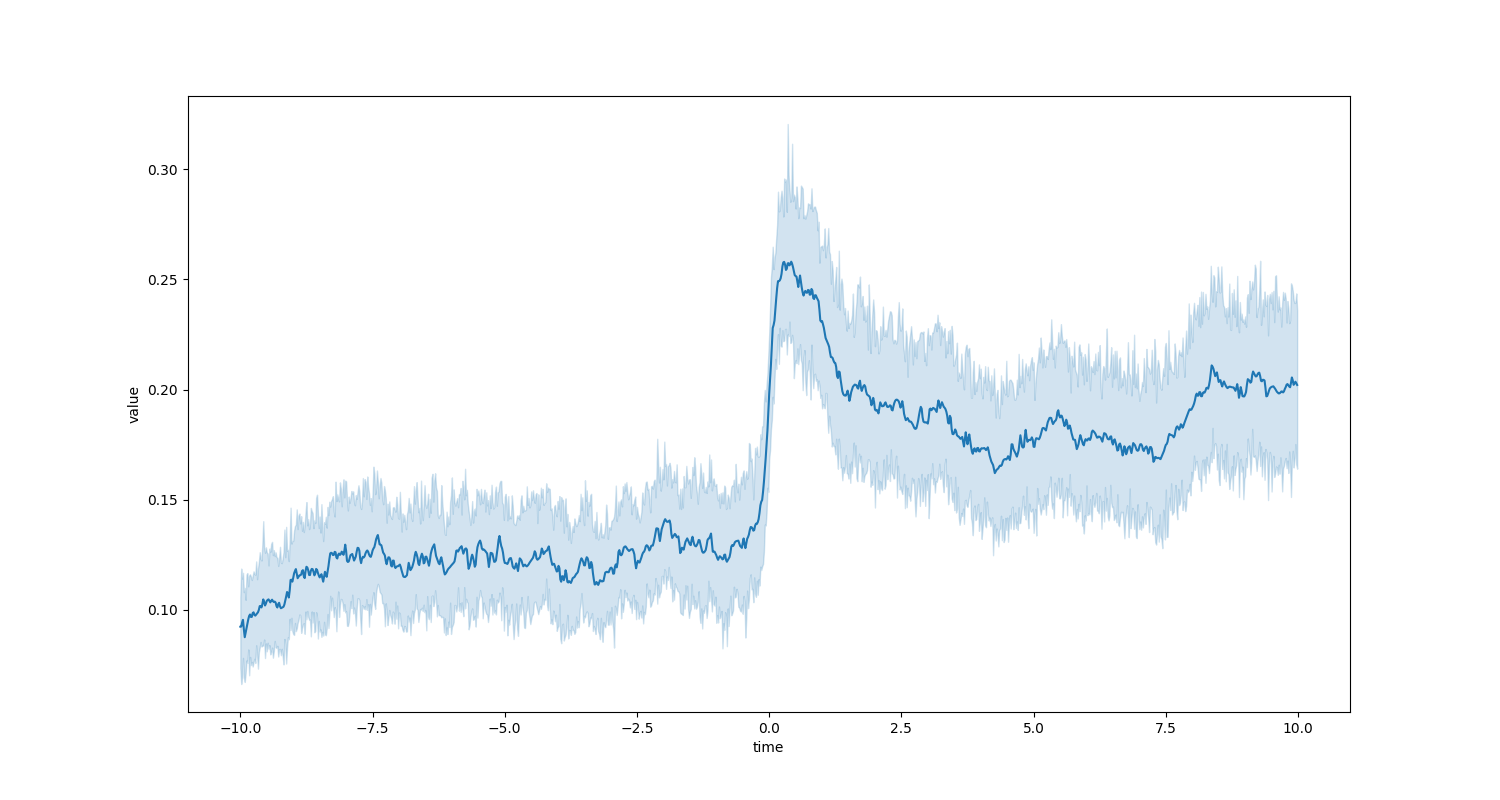

In [41]:
fig,ax=plt.subplots(figsize=(15,8))
sns.lineplot(
    data=melted,
    x='time',
    y='value',
    n_boot=50
)

In [88]:
from scipy.signal import find_peaks

<IPython.core.display.Javascript object>


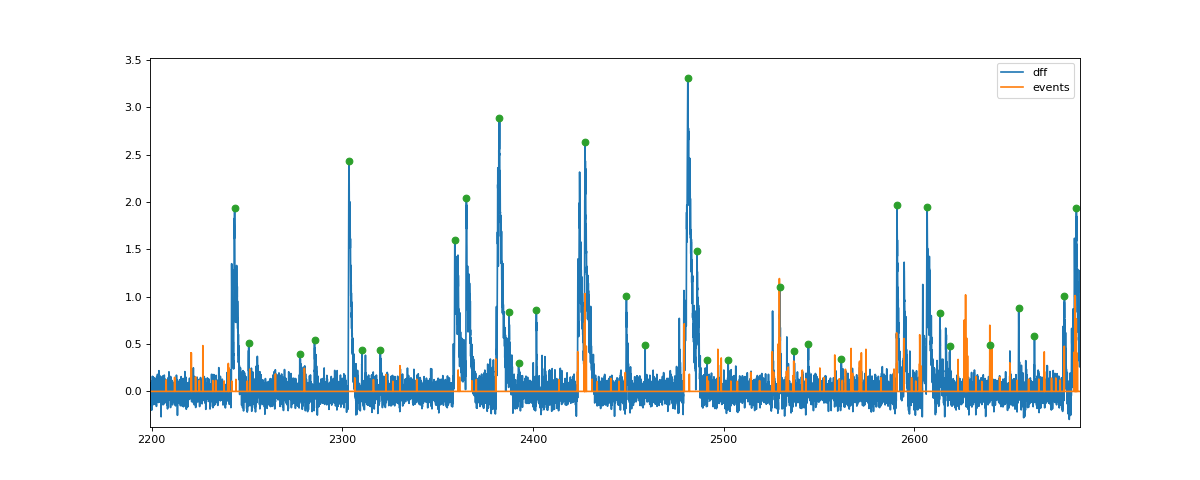

getting L0 events
getting L0 events


In [97]:
csid = 817102140

fig,ax = plt.subplots(figsize=(15,6))
ax.plot(
    session.dataset.ophys_timestamps,
    session.dataset.dff_traces.loc[csid]['dff']
)
ax.plot(
    session.dataset.ophys_timestamps,
    session.dataset.events.loc[csid]['events']
)
ax.legend(['dff','events'])

peaks, _ = find_peaks(session.dataset.dff_traces.loc[csid]['dff'], distance=150, prominence=(0.5))


ax.plot(
    session.dataset.ophys_timestamps[peaks],
    session.dataset.dff_traces.loc[csid]['dff'][peaks],
    marker='o',
    linestyle='none'
)

df = pd.DataFrame({
    'time':session.dataset.ophys_timestamps, 
    'dff':session.dataset.dff_traces.loc[csid]['dff'],
    'events':session.dataset.events.loc[csid]['events'],
})



In [100]:
peak_times = session.dataset.ophys_timestamps[peaks]
event_etr = vbu.event_triggered_response(
    df,
    parameter='events',
    event_times=peak_times,
)

<IPython.core.display.Javascript object>


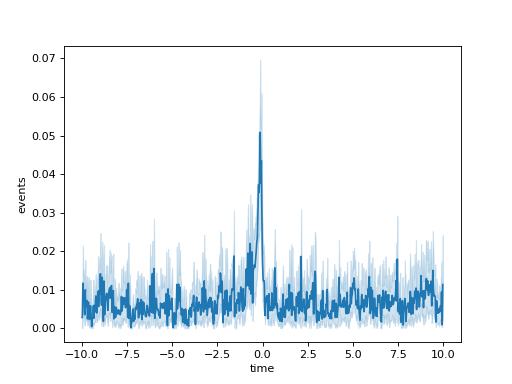

In [104]:
fig,ax=plt.subplots()
sns.lineplot(
    data=event_etr,
    x='time',
    y='events',
    n_boot=400,
)

In [1]:
dataset

NameError: name 'dataset' is not defined